In [51]:
import osmnx as ox
import networkx as nx
import pandas as pd
import numpy as np
import os
import main
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning) 
warnings.simplefilter(action='ignore',category=RuntimeWarning) 
warnings.simplefilter(action='ignore',category=DeprecationWarning)

In [52]:
def download_nwk(lat=38.435220,lon=141.303816,radius=1000,show=True, save=True, foldername='Input'):
    G = ox.graph_from_point(center_point=(lat,lon), network_type='all', dist=radius, simplify=True)
    fig, ax = ox.plot_graph(G,node_color='blue',bgcolor='white', show=show)
    G_proj = ox.project_graph(G)
    G_und = G_proj.to_undirected()
    return G_und



In [53]:
areas = {
    'ishinomaki': (38.435220,141.303816),
    'otaru' : (43.197519, 140.993391),
    'kochi' : (33.50505, 133.53161),
    'noto' : (37.39048, 136.90287),
    'sumatra' : (5.55326, 95.29700),
    'peru' : (-12.07860, -77.08124)
}

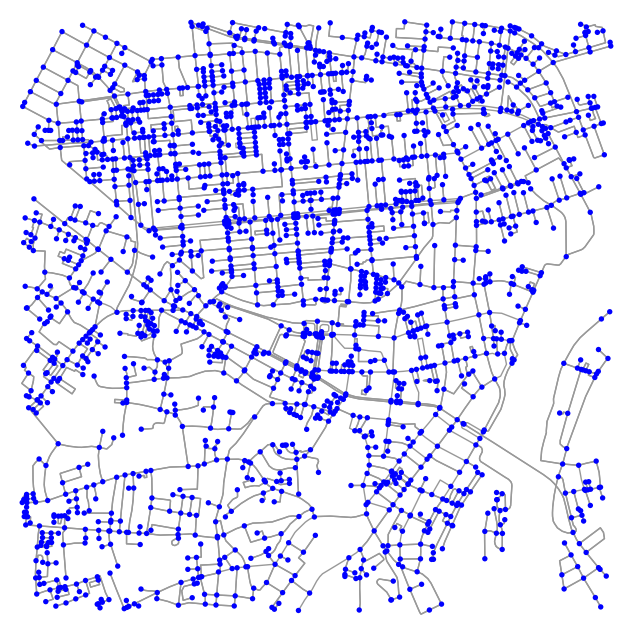

In [54]:
case = 'ishinomaki' #use names in 'areas' dictionary
#download network
G = download_nwk(areas[case][0],areas[case][1],1000,show=False, save=True, foldername=case)
#set seed for replication
np.random.seed(10)
#choose randomnly 4 nodes for evacuation

In [55]:
G #This is a projected graph MultiDiGraph

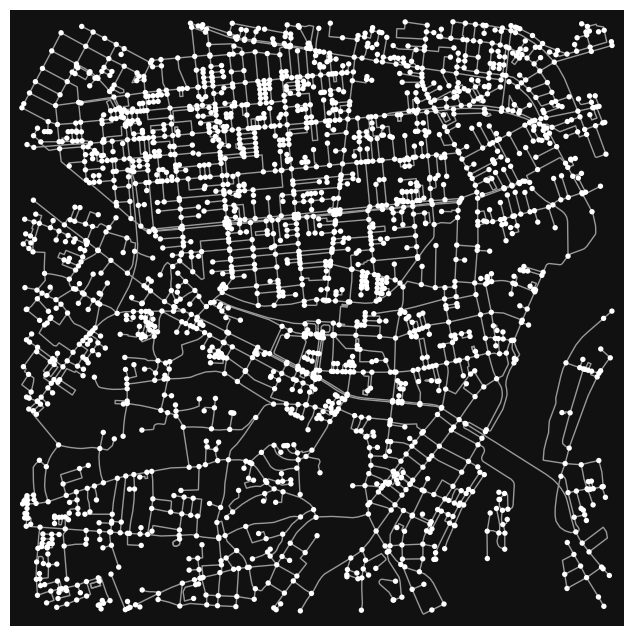

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [56]:
ox.plot_graph(G) # a MutiDiGraph can be plotted with ox.plot_graph

In [57]:
G.is_directed() #check if the graph is directed

False

In [58]:
#make a Graph from the MultiDiGraph to be able to calculate other indeces
Gnew = nx.Graph(G)

In [59]:
Gnew #this is a Graph

In [60]:
Gnew

In [61]:
#ISSUE 1: Is G == Gnew? 
G == Gnew

False

In [62]:
Gnew.is_multigraph(), G.is_multigraph()

(False, True)

In [63]:
#to plot an undirected graph
Gnew_nodes = pd.DataFrame(Gnew.nodes(data=True))
Gnew_nodes['y']=Gnew_nodes[1].apply(lambda x: x['y']).astype(float)
Gnew_nodes['x']=Gnew_nodes[1].apply(lambda x: x['x']).astype(float)
Gnew_nodes['osmid']=Gnew_nodes[0].astype(int)
Gnew_nodes.drop(1,axis=1,inplace=True)
Gnew_nodes.index = Gnew_nodes[0]

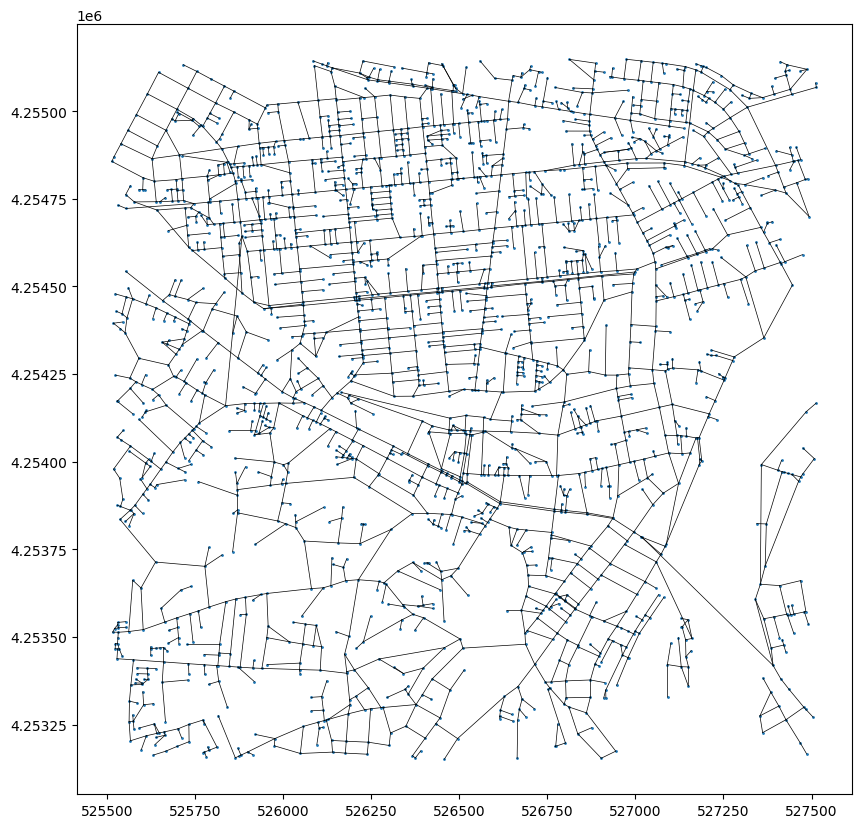

In [64]:
# plot a network graph from a pandas dataframe Gnew_nodes with x and y coordinates using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(Gnew_nodes['x'],Gnew_nodes['y'],s=1)
# add the edges of the graph
for edge in Gnew.edges():
    x = [Gnew_nodes.loc[edge[0]]['x'],Gnew_nodes.loc[edge[1]]['x']]
    y = [Gnew_nodes.loc[edge[0]]['y'],Gnew_nodes.loc[edge[1]]['y']]
    plt.plot(x,y,'k-',linewidth=0.5)